<a href="https://colab.research.google.com/github/StaThin/StaThin.github.io/blob/master/Esercizi_Lez_9_con_soluzioni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercizi Lezione  9 - Test statistici



## Esercizio 1

Sia $\mu$ il reddito medio annuo in migliaia di Euro per una certa popolazione che si suppone normale. Si estrae un campione i.i.d. di 100 individui dalla popolazione e si ottiene una media di 22.5 (migliaia di Euro) e una varianza campionaria $S^2 =  12.5$. Sottoponete a test l'ipotesi $H_0 : \mu =  22$  contro $H_1 : \mu > 22$. 

a. Definite una statistica test opportuna e calcolate il valore p. Commentate  e interpretate. 

b. Se l'assunzione di normalità non potesse essere fatta che cosa potreste concludere?



#### Soluzione

a. La statistica test osservata  è 
$$
t_{oss} = \frac{22.5 - 22}{\sqrt{12.5/100}} = 1.4142
$$
Poiché l'alternativa scelta è unilaterale destra il valore p è 
$$
p_{oss}  = P_0\{ T_{99} \ge 1.4142\} = 0.080.
$$
Il test non è significativo e non c'è evidenza sufficiente per rifiutare l'ipotesi $\mu = 22$. 

b. Se l'assunzione di normalità non è opportuna è comunque possibile usare l'approssimazione normale per grandi campioni per la statistica test $T$. Quindi 
$$
p_{oss}  \simeq  P_0\{ Z  \ge 1.4142\} = 0.079.
$$

## Esercizio 2 
 In un esperimento 16 topi sono suddivisi casualmente in 2 gruppi: un gruppo di animali trattati con un farmaco e un gruppo di controllo di animali non trattati. Il trattamento serve per prolungare la sopravvivenza dei topi dopo un'operazione. Al termine dell'esperimento si studia il numero di giorni di sopravvivenza dei topi.

 L'obiettivo dell'esperimento è quello di valutare se il trattamento prolunga il tempo di sopravvivenza.


In [0]:
tratt = c(94,197,16, 38, 99, 141, 23)
contr = c(52, 104, 146, 10, 51, 30, 40, 27, 46)

Supponiamo che i dati siano due campioni i.i.d indipendenti da due distribuzioni esponenziali di medie $\mu_1$ e $\mu_2$.  Definite un modello opportuno e sottoponete a test l'ipotesi 
$H_0: \mu_1 = \mu_2$ con un alternativa $\mu_1 > \mu_2$ usando il test del rapporto di verosimiglianza. Determinate una statistica test opportuna e interpretate il valore $p$.


### Soluzione

Chiamiamo $y = (y_1, \dots, y_7, y_8, \dots, y_{16})$ il vettore che concatena `tratt` e `contr`. 
Il modello specificato ha verosimiglianza congiunta
$$
L(\mu_1, \mu_2) = \prod_{i=1}^7 \frac{1}{\mu_1} e^{\frac{y_i}{\mu_1}}  \prod_{i=8}^{16} \frac{1}{\mu_2} e^{\frac{y_i}{\mu_1}}
$$
Da cui si ottiene la log-verosimiglianza
$$
\ell(\mu_1, \mu_2) = (-7 \log \mu_1 - 7 \frac{\bar y_1}{\mu_1}) +   (-9 \log \mu_2 - 9 \frac{\bar y_2}{\mu_2})
$$
dove $\bar y_1$ e $\bar y_2$ sono i valori medi dei due campioni. 

Una statistica test opportuna è la statistica del log-rapporto di verosimiglianza profilo
$$
W_P = 2 \{ \ell(\hat \mu_1, \hat \mu_2) - \ell(\tilde \mu, \tilde \mu)\}
$$
dove $\hat \mu_1, \hat \mu_2$ sono le stime di MV non vincolate e 
$\tilde \mu$ è la stima di MV vincolata sotto l'ipotesi che $\mu_1 = \mu_2$. Le stime non vincolate date l'indipendenza dei due campioni sono le due medie campionarie $\hat \mu_1 = \bar y_1$ e $\hat \mu_2 = \bar y_2$; la stima vincolata assumendo che $\mu_1 = \mu_2$ è la media aritmetica complessiva 
$$
\tilde \mu = \bar y = (7 \bar y_1 + 9 \bar y_2)/16.
$$
Quindi la statistica copo qualche manipolazione risulta
$$
W_P = 2 \{ 16 \log \bar y - 7 \log \bar y_1 - 9 \log \bar y_2\}
$$
e poiché $\bar y  = 69.625$, $\bar y_1 = 86.8571$ e $\bar y_2 = 56.2222$ risulta
$$
w_{oss} = 0.7526
$$
La teoria afferma allora che essendo il modello esponenziale un modello con verosimiglianza regolare, sotto $H_0 \mu_1 = \mu_2$ la distribuzione di $W_P$ ha una legge limite $\chi^2_1$ per $n\to \infty$. Quindi il valore p risulta
$$
p_{oss} = P_0\{\chi^2_1 \ge 0.7526\} = 0.3856.
$$  
Pertanto il test non indica una differnza significativa tra le medie del gruppo dei trattati e dei controlli. 

Tuttavia per questo test è abbastanza discutibile se con 16 osservazioni l'approssimazione chi-quadro è adeguata.

## Esercizio 3  (solo per Matematica)

Il valore $p$ può essere scritto come
$$
p_{oss} = 1 - F_0(d_{oss})
$$
dove $d_{oss}$ è il valore osservato della statistica test $D$ e $F_0$ è la funzione di ripertizione (che supponiamo continua) della statistica test sotto ipotesi nulla. 

Considerate il valore $p$ nel campionamento ripetuto, cioè la variabile aleatoria
$$
P  = 1 - F_0(D). 
$$
a. Qual è la distribuzione sotto ipotesi nulla della variabile aleatoria $P$?


### Soluzione

Sotto ipotesi nulla la funzione di ripartizione di $P$ è, per 
$0\le u \le 1$,  
\begin{align*}
\Pr_{0}\{1 - F_0(D) \le u \}  &= \Pr_0\{ 1 - u \le F_0(D)\}\\
&= \Pr_0 \{F_0^{-1}(1-u) \le D\}\\
&= \Pr_0 \{D \ge F_0^{-1}(1-u) \} \\
&= 1 - \Pr_0 \{D \le F_0^{-1}(1-u) \}\\
&= 1 - F_0\{  F_0^{-1}(1-u) \} = u.
\end{align*}
Si conclude che $P$ ha distribuzione uniforme tra $0$ e $1$. 

## Esercizio 4

Abbiamo raccolto dati sul prezzo $X$ (in euro) dell'hamburger e 
sulla quantità  $Y$ venduta in due giorni, in 12 punti vendita. 
I dati vengono sintetizzati con le seguente misure.
$$
\begin{matrix}
\Sigma x_iy_i = 32709.2 & \Sigma x_i =  35.9 & \Sigma y_i = 11090\\
\Sigma x_i^2 =  108.13  & \Sigma y^2_i = 10584612 & \\
\end{matrix}
$$

a. Stimare la retta di regressione e interpretarla. 

b. Trovare la devianza residua e l'errore standard stimato  $\widehat{se}(\hat \beta_1)$. 

c. Sottoporre a test l'ipotesi $\beta_1 = 0$. 

d. Mostrare la tavola di analisi della varianza e calcolare la statistica test $F$.  


### Soluzione

a. Il sistema di equazioni normali è $(C^TC)\beta = C^T y$ ossia
\begin{align*}
\textstyle \beta_0\, n   +  \beta_1 \sum x_i &= \textstyle \sum y_i \\
\textstyle \beta_0 \sum x_i + \beta_1 \sum x_i^2 &= \textstyle \sum x_i y_i\\
\end{align*}
Sostituendo 
\begin{align*}
12 \beta_0   +   35.9\beta_1 &= 11090 \\
 35.9\beta_0  +  108.13\beta_1 &= 32709.2\\
\end{align*}
Risolvendo si ottiene 
$$
\hat \beta_0 =  2845.88, \; \hat \beta_1 =  -642.35
$$
Il coefficiente di regressione inidca che all'aumentare del prezzo di 10 centesimi il numero di hamburger venduti nei due giorni cala di circa 64.2. 

b. La devianza residua è 
$$
y^T(I - H) y = y^T y - y C(C^TC)^{-1}C^T y = y^Ty - y^T C \hat \beta
$$
cioè 
$$
10584612 - \begin{pmatrix}
11090 & 32709.2\end{pmatrix}\begin{pmatrix} 
 2845.88\\
  -642.35
  \end{pmatrix} = 34735.62
$$
e quindi la stima della varianza è 
$$
S^2_{res} = 34735.62/(12-2) = 3473.562
$$
e della deviazione standard è 
$$
S_{res} = \sqrt{3473.562} = 58.94 
$$
La stima dell'errore standard di $\hat \beta_1$ è 
$$
\widehat{se}(\hat \beta_1) = \frac{S_{res}}{\sqrt{\sum_i(x_i - \bar x)^2}}
$$
che si calcola prima deducendo 
$$
\sum_i(x_i - \bar x)^2 = \sum_i x_i^2 - n \bar x^2 = 108.13 - 12 (35.9/12)^2 = 0.7292  
$$
e quindi 
$$
\widehat{se}(\hat \beta_1)  = \frac{58.94}{\sqrt{0.7292}}= 69.023.
$$
c. Il test t è
$$
t = \frac{\hat\beta_1}{\widehat{se}(\hat \beta_1)} = 
\frac{-642.35}{69.023} = -9.3.
$$
Il test è altamente significativo con un valore p
$$
p_{oss} = 2 P_0(t_{10} \ge 9.3) < 0.00001
$$
d. La tavola di analisi della varianza si ottiene calcolando 
la devianza totale
$$
SS_{Y} = \sum_i(y_i - \bar y)^2 = \sum_i y_i^2 - n \bar y^2 = 
10584612 - 12 (11090/12)^2 = 335603.67
$$ 
e la devianza di regressione
$$
SS_{\hat Y} = SS_Y - SS_{res} = 335603.67 - 34735.62 = 
300868.05
$$
Tavola di analisi della varianza
$$
\begin{array}{lrrrrr}
Variabilità & SS        & g.l.  & MS        & F     & p  \\\hline 
Spiegata    & 300868.05 & 1     & 300868.05 & 86.62 &  < 0.00001  \\
Residua     &  34735.62 & 10    &   3473.56 &       &    \\ \hline
Totale      & 335603.67 & 11    &           &       &    \\
\end{array}
$$
Il test F è identico al quadrato del test t di Student. L'$R^2$ è 
$$
R^2  = 0.896.
$$


## Esercizio 5

(Freedman)

Considerate il modello di regressione $Y_i = \alpha + \beta x_i + \epsilon_i$ con $\epsilon_i$ i.i.d. e normali $N(0, \sigma^2)$. 

Supponiamo che la teoria sottostante al problema ci suggerisca di sottoporre a test l'ipotesi $\beta=1$. Si adatta il modello ai dati per $ i=1,\dots,52$  col metodo dei minimi quadrati ottenendo $\hat \beta = 1.765$ con errore standard $\widehat{se} = 0.375$. 

Rispondere vero o falso alle domande seguenti e giustificare.

a. La statistica test per sottoporre a verifica $\beta=1$  è $t = 2.04$.

b. Il test di $\beta = 1$ è significativo.

c. Il test $\beta = 1$ è altamente significativo.

d. La probabilità che $\beta$ sia diverso da 1  è circa il $95\%$.

e. La probabilità che $\beta$ sia uguale a 1  è circa il $5\%$.

f. Se il modello è giusto e $\beta=1$  vi è circa il $5\%$ di probabilità di ottenere $|\hat\beta/\widehat{se}| > 2$.

g. Se il modello è giusto e $\beta=1$  vi è circa il $95\%$ di probabilità di ottenere $|\hat\beta/\widehat{se}| < 2$.

h. Il test dimostra che il modello teorico è giusto.

i. Il test assume che il modello teorico sia giusto.

l. Se il modello è giusto, il test fornisce evidenza che $\beta=1$.

### Soluzione

a. Sì. la statistica test osservata è 
$$
t_{oss} = \frac{1.765 - 1}{0.375} = 2.04
$$
Sotto ipotesi nulla è un'osservazione da una t di Student con 50 gradi di libertà.

b. Il valore p è (vedi i conti in R)
$$
p_{oss} =\textstyle  2\Pr_0 \{t_{50} \ge 2.04 \} = 0.047 
$$
Quindi il test è significativo

c. ma non altamente significativo. 

d. No. Non si può calcolare tale probabilità perché $\beta$ è un parametro.

e. idem.

f. Vero. 

g. Vero.

h. Falso. Il test suppone che il modello sia giusto. 

i. Vero. 

l. Falso. Se il modello è giusto, il test fornisce evidenza che $\beta\ne 1$. Il test assume il  modello $Y_i = \alpha + \beta x_i + \epsilon_i$, con le annesse ipotesi sugli errori. 
Il test si chiede se $\beta = 1$ o $\beta \ne 1$. L'ipotesi  $\beta= 1$ non è conforme ai dati come l'ipotesi alternativa.




In [2]:
2*(1-pt(2.04, 50))  # valore p 

[1] 0.04665043

## Esercizio 6 (solo per Informatica)

I dati seguenti mostrano la variabile `y`= massimo livello del mare in cm a Venezia negli anni `x` dal 1931 al 1981.

In [0]:
y = c(103, 78, 121, 116, 115, 147, 119, 114, 89, 102, 99, 91, 97, 
106, 105, 136, 126, 132, 104, 117, 151, 116, 107, 112, 97, 95, 
119, 124, 118, 145, 122, 114, 118, 107, 110, 194, 138, 144, 138, 
123, 122, 120, 114, 96, 125, 124, 120, 132, 166, 134, 138)
anni = c(1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 
1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 
1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 
1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 
1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981)

a. Determinare la retta stimata di regressione lineare semplice. Usare come variabile esplicativa la variabile  `anni` espressa in unità di scarti ripetto all'anno 1956.   

b. Fornite la tabella completa  delle stime dei parametri e della loro incertezza e interpretarle. 

c. Produrre la tavola di analisi della varianza. Calcolare l'indice di determinazione lineare e la statistica test F.

d. Effettuare il test di nullità della pendenza. 

e. Quale spiegazione potete dare del fenomeno che questi dati mettono in evidenza?

### Soluzione



In [4]:
summary(cbind(y, anni))
mod = lm(y ~ anni)
summary(mod)

       y              anni     
 Min.   : 78.0   Min.   :1931  
 1st Qu.:106.5   1st Qu.:1944  
 Median :118.0   Median :1956  
 Mean   :119.6   Mean   :1956  
 3rd Qu.:129.0   3rd Qu.:1968  
 Max.   :194.0   Max.   :1981  


Call:
lm(formula = y ~ anni)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.813 -11.211  -3.309   9.515  68.722 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -989.3822   346.4770  -2.856  0.00628 **
anni           0.5670     0.1771   3.201  0.00241 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.62 on 49 degrees of freedom
Multiple R-squared:  0.1729,	Adjusted R-squared:  0.1561 
F-statistic: 10.25 on 1 and 49 DF,  p-value: 0.002406


a. L'equazione stimata è 
$$
\hat y = 119.6 + 0.567 \, (anno - 1956)   
$$
Lo scatter è il seguente


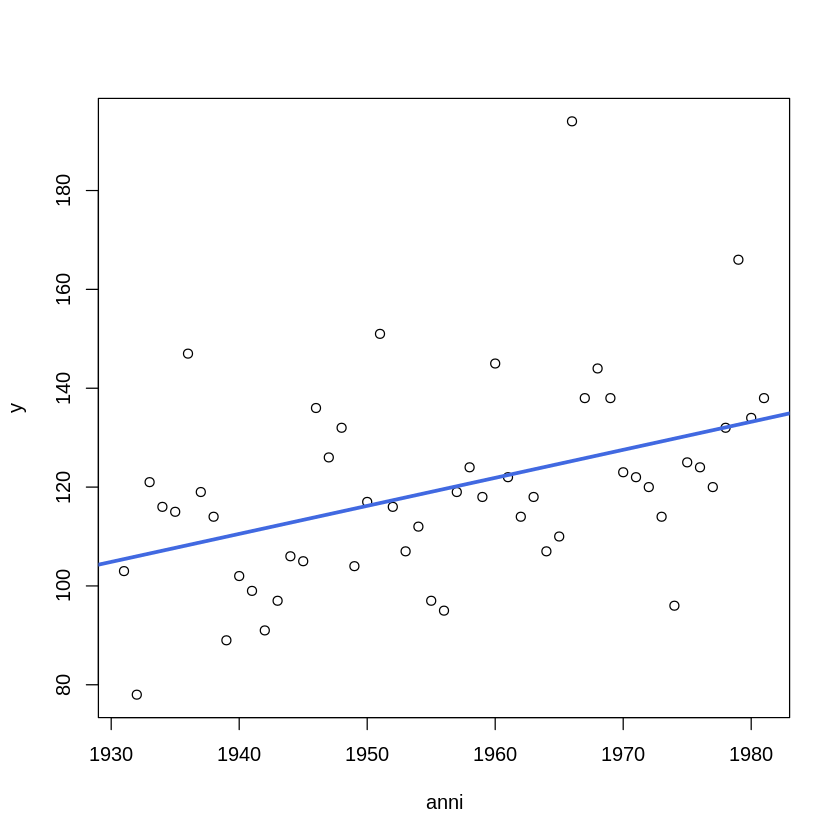

In [5]:
plot(y ~ anni)
abline(mod, col = 'RoyalBlue', lwd=3)

b. La tabella delle stime è la seguente
$$
\begin{array}{lrrrr}
        &      Stima & e.s.       & t      & p  \\ \hline   
(cost)  &   -989.382 &  346.4770 & - & - \\
anni    &      0.567 &    0.1771 &  3.201 & 0.00241 \\ \hline
s_{res} & 18.62      &   R^2 = 0.17  &   &         \\
\end{array}
$$
Quindi il livello massimo misurato cresce circa mezzo cm all'anno. La pendenza è significativamente diversa da zero.

L'intervallo di confidenza per la pendenza è $(0.21, 0.92)$ e non comprende lo zero. 



In [6]:
confint(mod)[2,]

2.5 %    97.5 % 
0.2110114 0.9229253

c. La tavola di analisi della varianza è la seguente

In [7]:
SSY = sum((y - mean(y))^2)
SSres = deviance(mod)
SSreg = SSY - SSres
c(SSreg, SSres, SSY)

[1]  3552.057 16988.100 20540.157

\begin{array}{lrrrrr}
Variabilità &  SS       & g.l.  & MS       & F     & p \\ \hline
spiegata    &   3552.06 &  1    & 3552.06  & 10.25 & 0.00241\\
residua     &  16988.10 & 49    &  346.70  &   \\ \hline
Totale      &  20540.16 & 50    &    -     &   \\ 
\end{array}

d. L'indice di determinazione lineare è $R^2 = 0.17$. Il test F è $f_{oss} = 10.25$ sotto $H_0$ è una realizzazione di una $F_{1,49}$.  Il test è altamente significativo ed equivalente al test t di Student visto prima. 

e. Molto probabilmente l'effetto sul livello del mare  non dipende dall'innalzamento delle acque dell'Adriatico, ma all'abbassamento del terreno dove è fissato il palo che serve per misurare l'altezza dell'acqua. 

## Esercizio 7

Si vuole verificare se una moneta è bilanciata. Sia $\theta$ la probabilità di testa in un lancio. Si voglia sottoporre a test $H_0: \theta = 1/2$ contro un'alternativa bilaterale. 
Si lancia la moneta $10$ volte. Sia $Y_i = 1$ se esce testa e $X_i = 0$ se esce croce. Sia $T = \sum_{i=1}^{10} Y_i$ la statistica test. Considerate le regioni critiche
$$
K_1 = \{ Y : | T - 5 | \ge 4\} , \quad 
K_1 = \{ Y : | T - 5 | \ge 3\}.
$$
a. Calcolare la probabilità di errore del I tipo  per $K_1$ e $K_2$.

b. Calcolare la  probabilità di errore del II tipo  per $K_1$ e $K_2$ se $\theta = 0.4$.


### Soluzione

a. La probabilità di errore del I tipo per $K_1$
$$
\Pr\{   | T - 5 | \ge 4 ; T \sim Bi(10, \theta = 1/2)\} = \Pr_{0.5}\{T = 0,1,9,10\} = 0.0215
$$


In [8]:
sum(dbinom(c(0,1,9,10), size = 10, prob = 1/2))

[1] 0.02148438

La probabilità di errore del I tipo per $K_2$ è 
$$
\Pr\{ | T - 5 | \ge 3 ; T \sim Bi(10, \theta = 1/2)\} = \Pr_{0.5}\{T = 0,1,2,8,9,10\} = 0.109375
$$

In [9]:
sum(dbinom(c(0,1,2,8,9,10), size = 10, prob = 1/2))

[1] 0.109375

b. La probabilità di errore del II tipo se $\theta = 0.4$ per $K_1$ è 
$$
\Pr\{ | T - 5 | < 4 ; T \sim Bi(10, \theta = 0.4)\} = \Pr_{0.4}\{T = 2,3,4,5,6,7,8\} = 0.952
$$

In [10]:
sum(dbinom(c(2,3,4,5,6,7,8), size = 10, prob = 0.4))

[1] 0.9519649

La probabilità di errore del II tipo se $\theta = 0.4$ per $K_2$ è 
$$
\Pr\{ | T - 5 | < 3 ; T \sim Bi(10, \theta = 0.4)\} = \Pr_{0.3}\{T = 3,4,5,6,7\} = 0.82
$$

In [11]:
sum(dbinom(c(3,4,5,6,7), size = 10, prob = 0.4))

[1] 0.8204157

# Commenti sulle risposte

### Esercizio 1
- Alcuni hanno fatto il test con un'alternativa bilaterale che comportanva un raddoppio del valore p. 
- Molto pochi hanno notato che con un campione di ampiezza 100 anche se la popolazione non ha distribuzione esattamente normale il teorema centrale del limite e il lemma di Slutsky permettono di approssimare la distribuzione campionaria della statistica T con una normale standard. Il p-value infatti cambia di poco. 

### Esercizio 2
- Mi ha fatto piacere che abbiate fatto quasi tutti questo esercizio. 
- Mi è sembrato strano il fatto che molti non abbiano calacolato il p-value esattamente in R. 

## Esercizio 3 (Matematica) 
- L'anno fatto in pochi. La distribuzione campionaria del p-value è uniforme tra $(0,1)$. Questo vuol dire che se si rifiuta la nulla quando il p-value è minore di 0.05 ad esempio nel lungo andare la probabilità di errore del I tipo è al massimo 0.05.

### Esercizio 4
- Come sempre non molti si lanciano nel dare interpretazione sul coefficiente di regressione. Un commento che ho trovato interessante è che alcuni si sono concentrati sul fatto per certi valori del prezzo la quantità venduta diventava (estrapolando) negativa. Questo è un fatto che accade con ogni retta di regressione, se ci pensate. L'interpretazione del modello è per forza limitata nel range dei dati osservati e poco oltre. 
- C'è stato un errore preoccupante e cioè che varie persone hanno calcolato male l'errore standard del coefficiente di regressione come $S_{res}/\sqrt{n}$ invece che 
$$
\frac{S_{res}}{\sqrt{\sum_i (x_i - \bar x)^2}}
$$
Nella regressione conta anche la variabile esplicativa!
- Vari errori a catena sono derivati da questo,  con la statistica F piccolissima. Alcuni hanno sbagliato anche il calcolo della F che doveva essere fatto partendo dalla scomposizione della devianza. 

### Esercizio 5 

- Purtroppo  questo esercizio contenevs un errore di battitura. Naturalmente il testo riguardava solo la verifica dell'ipotesi $\beta = 1$. Invece a un certo punto si parlava anche del test $\beta = 0$. 
- Comunque direi che complessivamente ve la siete cavata molto bene.  
- Solo qualcuno ha detto che la probabilità che $\beta \ne 0$ è maggiore di 0.95. Non si può parlare di probabilità dei parametri nell'inferenza frequentista!

### Esercizio 6 (Informatica) 

- L'esercizio era interessante, specialmente perché dai dati sembra che il livello del mare a Venezia cresca col passare degli anni mentre probabilmente l'effetto è causato dall'abbassamento del terreno dove è fissato il palo che serve per misurare l'altezza dell'acqua. 
- Solo uno studente ha prodotto le tavole dei coefficienti e dell'analisi della varianza. Molto apprezzato.

### Esercizio 7

- Ci sono stati vari studenti che hanno calcolato male le probabilità a causa dell'errata definizione della regione critica. 


